In [1]:
import pandas as pd
import pickle 
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt

### Load the Co-Occurance Matrix (DataFrame) From Pickle File


In [2]:
df=pd.read_pickle('coo_matrix')
df.shape 

(2000, 2000)

#### Generate a sparse matrix

In [3]:
X_sparse = csr_matrix(df)

### Find the right number of components 

In [4]:
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
X_tsvd = tsvd.fit_transform(df)
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [5]:
tot_var=[]
n_com=[]
total_variance = 0.0
n_components =0
for explained_variance in tsvd_var_ratios:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    tot_var.append(total_variance)
    n_com.append(n_components)


    
    

### Plot the variance explained.

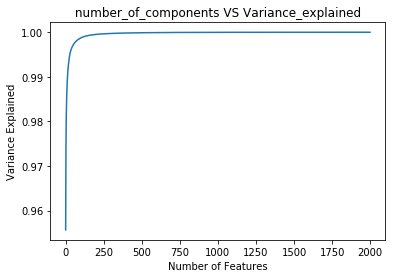

In [6]:
plt.title(' number_of_components VS Variance_explained ')
plt.plot(n_com,tot_var)
plt.ylabel('Variance Explained')
plt.xlabel('Number of Features')
plt.show()

### Method to get goal Variance

In [7]:
#https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

#### Lets take 99 percent of Variance

In [8]:
# Run function
k=select_n_components(tsvd_var_ratios, 0.99)
print(k)

13


### Applyting the rght number of components 

In [9]:
tsvd=TruncatedSVD(n_components=k)
tsvd.fit(df)
X_tsvd=tsvd.transform(df)


In [10]:
tsvd_df=pd.DataFrame(X_tsvd,index=df.index)

In [11]:
tsvd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
000,2.027232,2.142010,-0.009319,0.076854,0.095986,0.204613,0.082212,0.016796,0.227405,-0.122966,0.148466,-0.215279,0.066039
10,3.051680,1.429986,1.664773,1.208102,1.488211,1.299479,-0.377073,-0.033987,0.557762,-0.372493,0.839316,-0.720446,0.518788
100,6.242058,11.211124,1.051378,2.945258,1.636329,4.873807,4.477640,0.771092,2.863608,-2.366042,3.150942,-4.989025,11.433600
11,4.033119,0.311177,1.606945,1.903408,0.079170,0.248053,0.201775,0.063597,0.457964,-0.149396,0.759259,-1.109280,0.240884
12,4.075507,4.434190,1.087334,0.036845,1.306695,0.413580,0.196024,0.137933,0.592505,-0.413079,1.116041,-0.875016,0.946341
13,1.010677,0.129898,0.200510,0.223761,1.311146,0.786115,-0.548306,-0.127296,0.012868,-0.179858,0.424672,-0.705370,-0.364125
14,1.028848,1.225282,0.152425,0.156574,0.318028,0.875125,0.883561,-0.133878,-0.018320,-0.072566,0.406092,-0.375577,0.402656
15,0.016994,0.189765,0.270152,0.230807,0.304988,0.650303,0.245661,0.064073,0.580945,-0.211096,0.772424,-0.955483,-0.127913
16,1.020653,0.316079,1.080219,-0.106441,0.100349,0.285690,0.171514,0.035342,0.291758,-0.151041,0.552025,-0.564651,1.225236
17,0.020794,1.221109,0.986912,-0.214288,0.038825,0.106993,0.073113,0.021912,0.126032,-0.044045,0.145777,-0.173630,0.256103


#### Convert the Data Frame such that words are in a coloumn later can be converted to a Dictonary 

In [12]:

tsvd_df['word']=tsvd_df.index
tsvd_df = tsvd_df.reset_index(drop=True)

In [13]:
tsvd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,word
0,2.027232,2.142010,-0.009319,0.076854,0.095986,0.204613,0.082212,0.016796,0.227405,-0.122966,0.148466,-0.215279,0.066039,000
1,3.051680,1.429986,1.664773,1.208102,1.488211,1.299479,-0.377073,-0.033987,0.557762,-0.372493,0.839316,-0.720446,0.518788,10
2,6.242058,11.211124,1.051378,2.945258,1.636329,4.873807,4.477640,0.771092,2.863608,-2.366042,3.150942,-4.989025,11.433600,100
3,4.033119,0.311177,1.606945,1.903408,0.079170,0.248053,0.201775,0.063597,0.457964,-0.149396,0.759259,-1.109280,0.240884,11
4,4.075507,4.434190,1.087334,0.036845,1.306695,0.413580,0.196024,0.137933,0.592505,-0.413079,1.116041,-0.875016,0.946341,12
5,1.010677,0.129898,0.200510,0.223761,1.311146,0.786115,-0.548306,-0.127296,0.012868,-0.179858,0.424672,-0.705370,-0.364125,13
6,1.028848,1.225282,0.152425,0.156574,0.318028,0.875125,0.883561,-0.133878,-0.018320,-0.072566,0.406092,-0.375577,0.402656,14
7,0.016994,0.189765,0.270152,0.230807,0.304988,0.650303,0.245661,0.064073,0.580945,-0.211096,0.772424,-0.955483,-0.127913,15
8,1.020653,0.316079,1.080219,-0.106441,0.100349,0.285690,0.171514,0.035342,0.291758,-0.151041,0.552025,-0.564651,1.225236,16
9,0.020794,1.221109,0.986912,-0.214288,0.038825,0.106993,0.073113,0.021912,0.126032,-0.044045,0.145777,-0.173630,0.256103,17


### Convert the DataFrame into a Dictonary

In [14]:
tsvd_dict=tsvd_df.set_index('word').T.to_dict('list')

### Save the Dictonary into a pickle file. 

In [15]:
with open('tsvd_dict', 'wb') as handle:
    pickle.dump(tsvd_dict, handle)